# Matplotlib - 3 Interactive plots, animations

In [2]:

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


## Motion in space.
Consider a point evolving in space, whose coordinates are given by the position vector
$$
\mathbf{r}(t) = [x(t), y(t), z(t)].
$$
Its *velocity* is the vector
$$
\mathbf{v}(t) = [x'(t), y'(t), z'(t)].
$$
Its acceleration is the vector
$$
\mathbf{a}(t) = [x''(t), y''(t), z''(t)].
$$



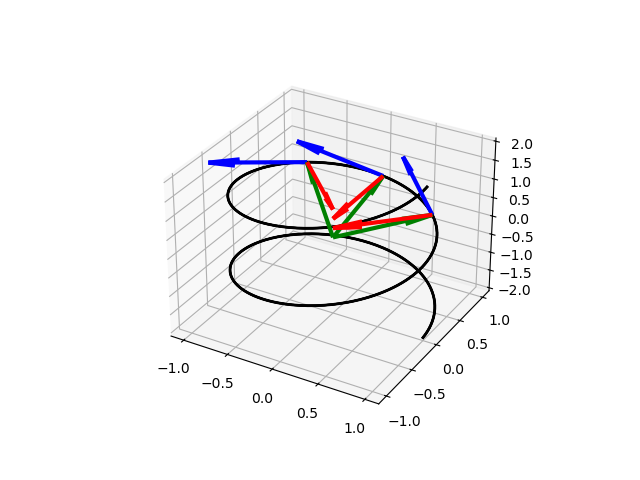

In [17]:
plt.close('all')
def r(t):
    return np.array([np.cos(t), np.sin(t), t/np.pi])
def v(t):
    return np.array([-np.sin(t), np.cos(t), 1/np.pi])
def a(t):
    return np.array([-np.cos(t), -np.sin(t), 0])
    


# fig = plt.figure() 
# ax = fig.add_subplot(projection='3d')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
TT = np.linspace(-2*np.pi,2*np.pi,501)
ax.plot(r(TT)[0], r(TT)[1], r(TT)[2], linewidth=2, color='black')

t = 3*np.pi/4

def plot(t):
    TT = np.linspace(-2*np.pi,2*np.pi,501)
    ax.plot(r(TT)[0], r(TT)[1], r(TT)[2], color='black')
    ax.quiver(0,0,0, *r(t), color='green', linewidth=3, label = 'r(t)')
    ax.quiver(*r(t), *v(t), color='blue', linewidth=3, label = 'v(t)')
    ax.quiver(*r(t), *a(t), color='red', linewidth=3, label = 'a(t)')
    # ax.legend()

plot(np.pi/4)
plot(np.pi/2)
plot(3*np.pi/4)





interactive(children=(FloatSlider(value=-0.08318530717958605, description='t', max=6.283185307179586, min=-6.2…

<function __main__.plot(t)>

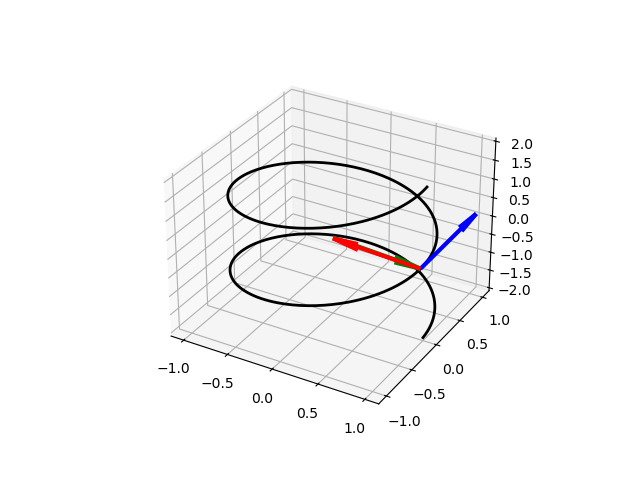

In [19]:
from ipywidgets import interact
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


def plot(t):
    ax.cla()
    TT = np.linspace(-2*np.pi,2*np.pi,501)
    ax.plot(r(TT)[0], r(TT)[1], r(TT)[2], linewidth=2, color='black')
    ax.quiver(0,0,0, *r(t), color='green', linewidth=3, label = 'r(t)')
    ax.quiver(*r(t), *v(t), color='blue', linewidth=3, label = 'v(t)')
    ax.quiver(*r(t), *a(t), color='red', linewidth=3, label = 'a(t)')
    # ax.quiver(*r(t), *np.cross(v(t),a(t)), color='black', linewidth=3, label = 'a(t)')
    # ax.legend()
    
# plot(t)
interact(plot, t = (-2*np.pi,2*np.pi, 0.1))



## Lissajou curves: 

Lissajou's curves are parametric curves with equation
$$
x(t) = \sin(nt),\ y(t) = \sin(mt)
$$
with $n,m \in \mathbb{N}$.

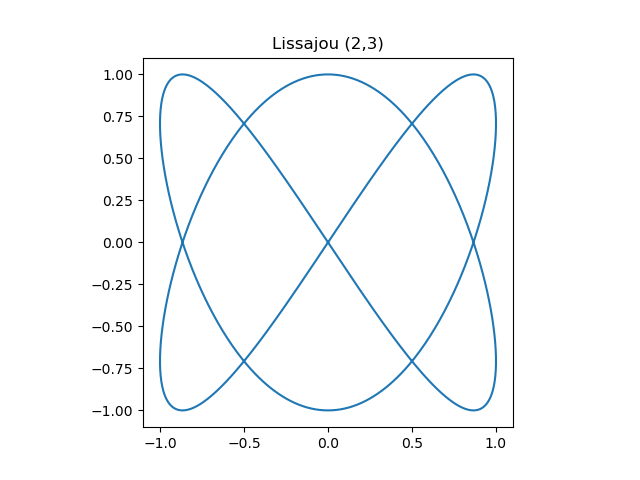

In [23]:
fig, ax = plt.subplots()
def plot(n,m):
    ax.cla()
    T = np.linspace(0,2*np.pi, 1001)
    ax.plot(np.sin(n*T), np.sin(m*T))
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Lissajou ({n},{m})')
n = 2

m = 3
plot(n,m)


interactive(children=(IntSlider(value=5, description='n', max=10, min=1), IntSlider(value=5, description='m', …

<function __main__.plot(n, m)>

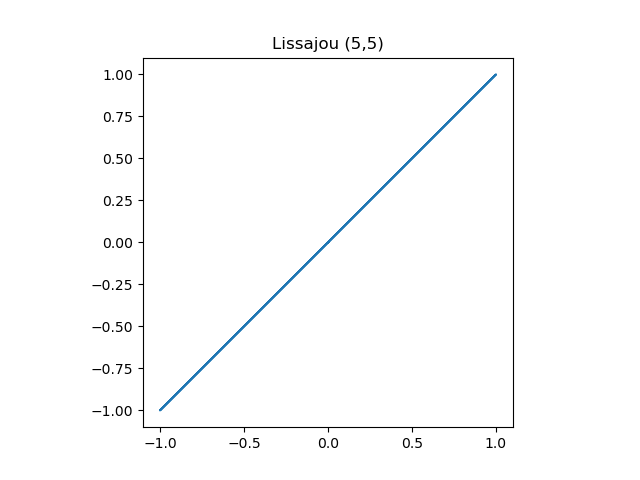

In [24]:
fig, ax = plt.subplots()
n = 8
m = 3
def plot(n,m):
    ax.cla()
    T = np.linspace(0,2*np.pi, 1001)
    ax.plot(np.sin(n*T), np.sin(m*T))
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Lissajou ({n},{m})')
interact(plot, n = (1,10,1), m = (1,10,1))


interactive(children=(FloatSlider(value=0.0, description='y0', max=1.0, min=-1.0, step=0.05), Output()), _dom_…

<function __main__.plot(y0)>

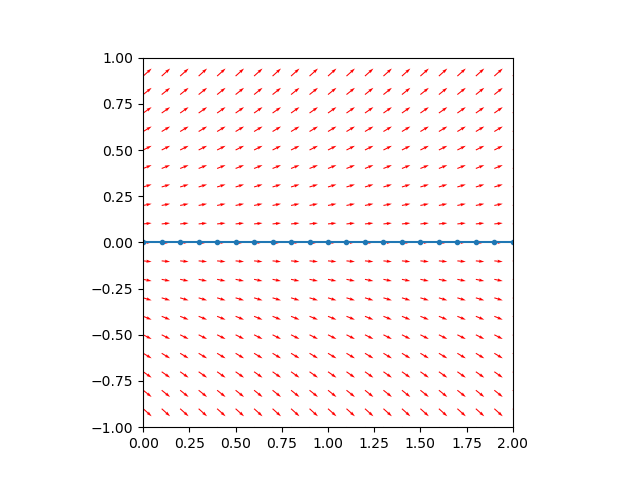

In [26]:
import scipy
def G(x,y):
    return y

n = 21
x = np.linspace(0,2,n)
y = np.linspace(-1,1,n)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
plt.quiver(X,Y,np.ones(n*n),G(X,Y), color = 'red')

y0 = 0.2
def plot(y0):
    ax.cla()
    plt.quiver(X,Y,np.ones(n*n),G(X,Y), color = 'red')
    # solves problem 4 using scipy
    xx = np.linspace(0,2,21)
    sol = scipy.integrate.odeint(lambda y,t: G(t,y), y0, xx)
    plt.plot(xx,sol,'.-')
    ax.set_aspect('equal', 'box')
    ax.axis([0,2,-1,1])
# plot(0.1,11)
# 
interact(plot, y0 = (-1,1,0.05))


interactive(children=(FloatSlider(value=0.0, description='y0', max=1.0, min=-1.0, step=0.05), Output()), _dom_…

<function __main__.plot(y0)>

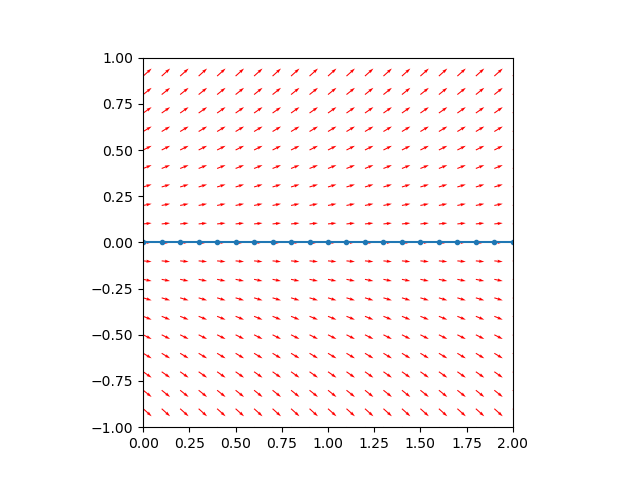

In [27]:
import scipy
def G(x,y):
    return y

n = 21
x = np.linspace(0,2,n)
y = np.linspace(-1,1,n)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

y0 = 0.2
def plot(y0):
    ax.cla()
    plt.quiver(X,Y,np.ones(n*n),G(X,Y), color = 'red')
    xx = np.linspace(0,2,21)
    sol = scipy.integrate.odeint(lambda y,t: G(t,y), y0, xx)
    plt.plot(xx,sol,'.-')
    ax.set_aspect('equal', 'box')
    ax.axis([0,2,-1,1])
# plot(0.1,11)
interact(plot, y0 = (-1,1,0.05))


interactive(children=(FloatSlider(value=0.0, description='y0', max=3.0, min=-3.0, step=0.05), Output()), _dom_…

<function __main__.plot(y0)>

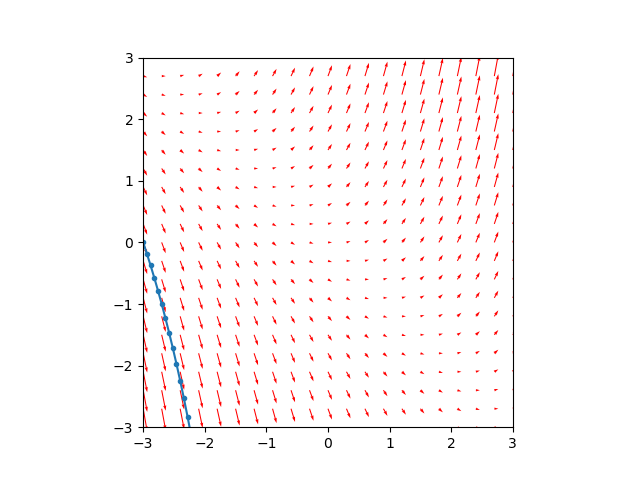

In [28]:
import scipy
def G(x,y):
    return x+y

n = 21
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()


y0 = 0.
def plot(y0):
    ax.cla()
    plt.quiver(X,Y,np.ones(n**2),G(X,Y), color = 'red')
    xx = np.linspace(-3,3,101)
    sol = scipy.integrate.odeint(lambda y,t: G(t,y), y0, xx)
    plt.plot(xx,sol, '.-')
    ax.set_aspect('equal', 'box')
    ax.axis([-3,3,-3,3])
interact(plot, y0 = (-3,3,0.05))

interactive(children=(FloatSlider(value=0.0, description='p0', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

<function __main__.plotHermitte(p0, p1, q0, q1)>

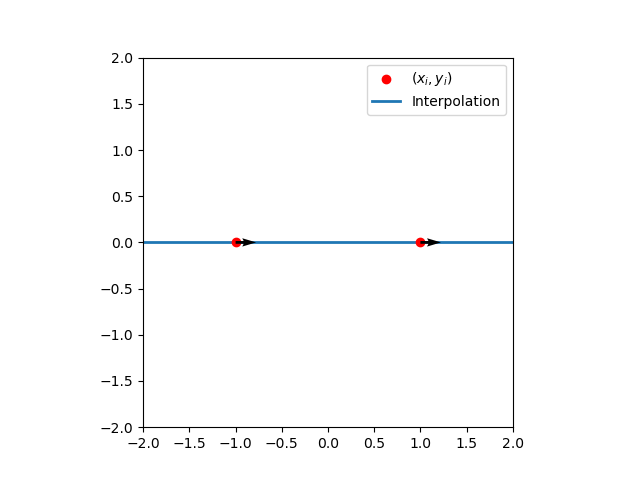

In [29]:
from numpy.polynomial import Polynomial

rng = np.random.default_rng()

fig, ax = plt.subplots()
def plotHermitte(p0,p1,q0,q1):
    ax.cla()
    X = np.array([-1.,1.])
    Y = np.array([p0,p1,q0,q1])
    M = np.empty((4,4))
    for i in range(2):
        M[i] = [X[i]**p for p in range(4)]
        M[i+2] = [p * X[i]**(p-1) for p in range(4)]
    H = Polynomial(np.linalg.solve(M,Y))

    ax.scatter(X,Y[0:2],color='red',label = r'$(x_i,y_i)$',zorder = 1)
    ax.quiver(X, Y[0:2], [1,1], Y[2:4])
    x = np.linspace(-2,2,101)
    ax.plot(x,H(x), linewidth=2, label = 'Interpolation',zorder = 0)
    ax.set_aspect('equal', 'box')
    ax.axis([-2,2,-2,2])
    ax.legend(loc=0)

interact(plotHermitte, p0 = (-1,1,0.1),p1 = (-1,1,0.1), q0 = (-5,5,0.1), q1 = (-5,5,0.1))


interactive(children=(FloatSlider(value=0.0, description='p0', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

<function __main__.plotHermitte(p0, p1, q0, q1)>

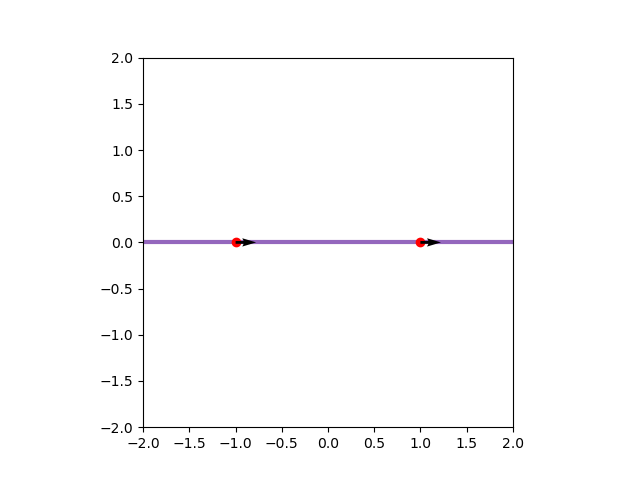

In [33]:
from numpy.polynomial import Polynomial

rng = np.random.default_rng()

fig, ax = plt.subplots()
Phis = []

X = [-1,1]

M = np.empty((4,4))
for i in range(2):
    M[i] = [X[i]**p for p in range(4)]
    M[i+2] = [p * X[i]**(p-1) for p in range(4)]
for i in range(4):
    Y = np.zeros(4)
    Y[i] = 1
    Phis.append(Polynomial(np.linalg.solve(M,Y)))

def plotHermitte(p0,p1,q0,q1):
    ax.cla()
    X = np.array([-1.,1.])
    Y = np.array([p0,p1,q0,q1])

    ax.scatter(X,Y[0:2],color='red',label = r'$(x_i,y_i)$',zorder = 1)
    ax.quiver(X, Y[0:2], [1,1], Y[2:4])

    x = np.linspace(-2,2,101)
    ax.plot(x,p0 * Phis[0](x), linewidth=1, label = 'p0',zorder = 0)
    ax.plot(x,p1 * Phis[1](x), linewidth=1, label = 'p1',zorder = 0)
    ax.plot(x,q0 * Phis[2](x), linewidth=1, label = 'q0',zorder = 0)
    ax.plot(x,q1 * Phis[3](x), linewidth=1, label = 'q1',zorder = 0)

    H = p0 * Phis[0] + p1 * Phis[1] + q0 * Phis[2] + q1 * Phis[3]
    ax.plot(x,H(x), linewidth=3, label = 'Interpolation',zorder = 0)
    ax.set_aspect('equal', 'box')
    ax.axis([-2,2,-2,2])
   
# ax.legend(loc=0)

interact(plotHermitte, p0 = (-1,1,0.1),p1 = (-1,1,0.1), q0 = (-5,5,0.1), q1 = (-5,5,0.1))

## Animations
import matplotlib.animation as animation



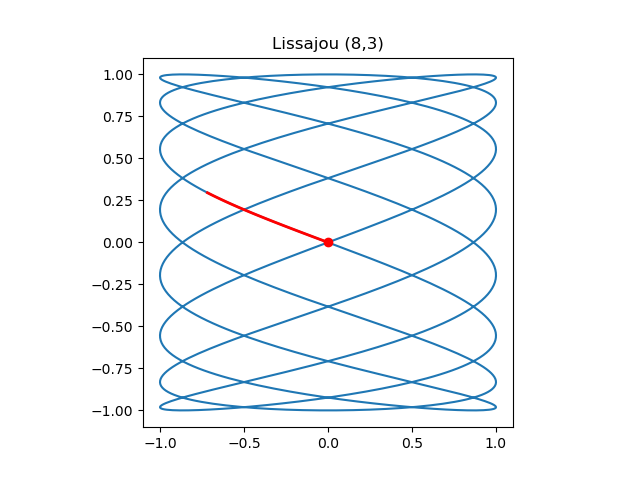

In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

plt.close('all')
fig, ax = plt.subplots()

n = 8
m = 3
# def init():
    
def plot(t):
    ax.cla()
    T = np.linspace(0,2*np.pi, 1001)
    ax.plot(np.sin(n*T), np.sin(m*T))
    T = np.linspace(t-0.1,t,101)
    ax.plot(np.sin(n*T), np.sin(m*T), linewidth=2, color='red')
    ax.plot(np.sin(n*t), np.sin(m*t), 'o', color = 'red')
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Lissajou ({n},{m})')

ani = FuncAnimation(fig, plot, frames=np.linspace(-np.pi, np.pi, 128), repeat=True)
ani.save('Lissajou.gif')


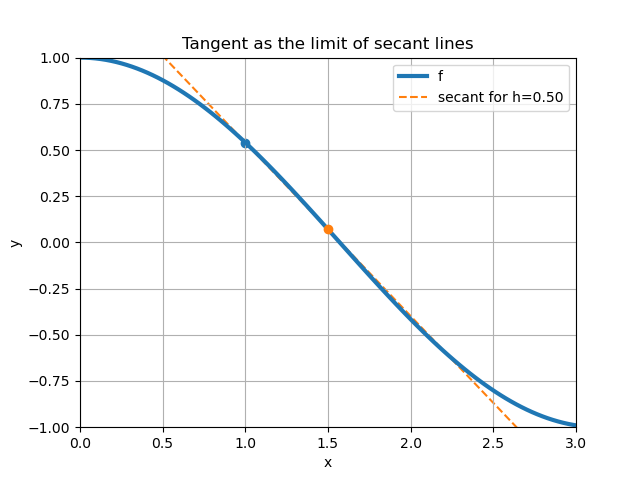

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

plt.close('all')
fig, ax = plt.subplots()

# we will start with cos x from 0 to pi
def f(x):
    return np.cos(x)
def fp(x):
    return -np.sin(x)
    
def tanplot(h):
    ax.cla()
    X = np.linspace(0,np.pi, 101) 
    ax.plot(X,f(X), linewidth=3,label = 'f')
    x0 = 1
    plt.scatter(x0,f(x0))
    if h != 0:
        plt.plot(X, f(x0) + (f(x0+h) - f(x0))/h * (X-x0),label = f'secant for h={h:.2f}', linestyle='--',zorder = 0)
    else:
        ax.plot(X,f(x0) + fp(x0) * (X-x0), label='tangent', linestyle='-', linewidth=3)
    plt.scatter(x0+h, f(x0+h), marker='o',zorder = 2)
    ax.grid()
    ax.legend()
    ax.set_title('Tangent as the limit of secant lines')
    ax.set_xlabel('x')
    
    ax.set_ylabel('y')
    ax.axis([0,3,-1,1])

ani = FuncAnimation(fig, tanplot, frames=np.linspace(-0.5, 0.5, 31), blit=False, repeat=True)
ani.save('tangent.gif')
# tanplot(0.1)



In [ ]:
np.linspace(1,0.1,11)

In [2]:
?FuncAnimation


Init signature:
FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
`TimedAnimation` subclass that makes an animation by repeatedly calling
a function *func*.

.. note::

    You must store the created Animation in a variable that lives as long
    as the animation should run. Otherwise, the Animation object will be
    garbage-collected and the animation stops.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied using `functools.partial` or via the *fargs*
    parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    It is often more convenient to provide the arguments u